<a href="https://colab.research.google.com/github/CWanjohi/SimpleImageClassifier/blob/master/DIP_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
Primary Objective: Create CNN model. Use the model to classify handwritten digits.
Secondary: CNN to generate artistic work.

# Workflow
1. How to load the MNIST dataset and examine structure.
  *   Use any library to load the dataset- Tensorflow,PyTorch.
  *   Examine shape, size and quantity(Image_processing).
  *   View some random sample using OpenCV,matplotlib etc. of the handwritten digits and complexity of the images.

2. Use numpy etc. to prepare the dataset for training.
  *  Ensure the data format and shape is appropriate for the model's input (one-hot encoding).
  *   Ensure data normalization.
3. Create a CNN model.
  *   Input image-28x28x1 
  *   2 convolutional layers (kernel size 3x3). 1st will have 64 filters, 2nd will have 32. Use ReLU (Rectified Linear Unit) as an activation function.
  *   Max pooling 2x2
  *   Dropout rate-0.25
  *   Use dense layer with 128 outputs
  *   Add dropout layer using rate setting-0.5
  *   Add the final dropout layer that indicates the class probabilities

4. Train model using MNIST dataset.
  *   train for 10 epochs with batch size- 32

5. Plot graphs to show how training and validation loss and accuracy changed with respect to the epochs completed.

6. Save the model for future use in the 2nd part.
7. Test model using random samples training set.














# Deliverable
Jupyter notebook to document the workflow. View samples from the dataset, convert to appropriate format for the deep learning library.

# Code




In [1]:
%tensorflow_version 1.x 
#load dataset
from tensorflow.keras.datasets import mnist


TensorFlow 1.x selected.


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
#display data samples from training and test data.

print("Initial dimensions and shape of x_train: ",str(x_train.shape))
print("Total number of samples in training data: ",str(len(x_train)))
print("Number of labels in training data: ",str(len(y_train)))

print("Initial dimensions and shape of test data: ",str(x_test.shape),"\n")
print("Total number of samples in test data: ",str(len(x_test)))
print("Number of labels in test data: ",str(len(x_test)))

print("Dimension of training data: ",str(x_train[0].shape))
print("Labels of training data ",str(y_train.shape))

print("Dimension of test data: ",str(x_test[0].shape))
print("labels of test data: ",str(y_test.shape))

Initial dimensions and shape of x_train:  (60000, 28, 28)
Total number of samples in training data:  60000
Number of labels in training data:  60000
Initial dimensions and shape of test data:  (10000, 28, 28) 

Total number of samples in test data:  10000
Number of labels in test data:  10000
Dimension of training data:  (28, 28)
Labels of training data  (60000,)
Dimension of test data:  (28, 28)
labels of test data:  (10000,)


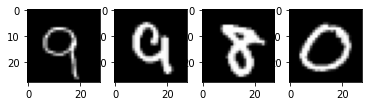

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#Objective: View random samples using OpenCV,matplotlib etc. of the handwritten digits and complexity of the images.
#plot 6 images using the subplot function.
#set the colormap to grey. Since the image dataset is grayscale/black and white.
plt.subplot(141)
random_number = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_number],cmap=plt.get_cmap('gray'))

plt.subplot(142)
random_number = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_number], cmap=plt.get_cmap('gray'))

plt.subplot(143)
random_number = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_number], cmap=plt.get_cmap('gray'))

plt.subplot(144)
random_number = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_number], cmap=plt.get_cmap('gray'))

Prepare the dataset using keras
Keras requires our data in a 4-D shape (60000,28,28,1). We loaded the data as a 3-D shape (60000,28,28).
We need our labels to be one-hot encoded into the data

In [4]:
#store the data's rows and columns
image_rows = x_train[0].shape[0]
image_columns = x_train[0].shape[1]

#get the data into the right shape, 4-D tensor.
x_train = x_train.reshape(x_train.shape[0],image_rows,image_columns,1)
x_test = x_test.reshape(x_test.shape[0],image_rows,image_columns,1)

#store the shape of a single image for future use 
input_shape = (image_rows,image_columns,1)

#change image type to float32 from unsignedint
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalize the data by changing the range from 0-255 to 0-1
x_train /= 255.0 
x_test /= 255.0

print("X_train shape: ",x_train.shape)
print(x_train.shape[0], "x_train samples")
print(x_test.shape[0], "x_test samples")

X_train shape:  (60000, 28, 28, 1)
60000 x_train samples
10000 x_test samples


In [5]:
#Perform One-Hot Encoding of the data labels
from tensorflow.keras.utils import to_categorical

#one-hot encode for the outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#count the number of columns in the OHE matrix
print("Number of classes: " + str(y_test.shape[1]))
num_classes = y_test.shape[1] #classed the images as images for 1,2,3,4,...,10

Number of classes: 10


Creating the CNN model

In [6]:
#input is an image 28x28 as grayscale

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.backend import backend as K
from tensorflow.keras.optimizers import SGD

#What's the criteria used in determining number of filters in the convolutional layers?
#-> https://www.quora.com/What-is-a-filter-in-the-context-of-Convolutional-Neural-Networks

model = Sequential()

#the first layer-filter size=32 which reduces our layer size to 26*26*32
# use ReLU as activation function. Input shape is 28x28x1

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))

#second layer. Filter size=64. Reduces the layer size to 24*24*64
model.add(Conv2D(64, kernel_size=(3,3),activation ='relu'))

#specify a max_pool with a size of 2*2. Reduces the layer size to 12*12*64
model.add(MaxPooling2D(pool_size=(2,2)))

#dropout to reduce Overfitting
model.add(Dropout(0.25))

#flatten the tensor before being passed to the output layer
#Flattening a tensor reshapes the tensor to have the shape that is equal to the number of elements contained in the tensor.
#It goes from 12*12*64 to 9612*1

model.add(Flatten())

#use another dropout layer
model.add(Dropout(0.5))

#create a fully-connected/Dense layer
model.add(Dense(num_classes, activation='softmax'))

#compile the model which create an object that store the model.
#set the optimizer to use stochastic gradient descent; learning rate=0.01
#set the loss function to be categorical_crossentropy as it's suitable for multiclass problems.
#Finally, the metrics(to judge the model's performance) we use accuracy.
model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])

#the summary function can be used to show the models layers and parameters
print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9216)              0         
_________________________________________

Model training

In [7]:
batch_size = 32
epochs = 10

#store the results for plotting later on.
#in the fit function, we specify the dataset as x_train and y_train.
#batch size can be from 16-128(RAM intensive)
#the number of epochs(learning iterations) is usually 10-100
#the validation dataset is (x_test,y_test)
# verbose=1 to set the training to outputperformance metrics every epoch.

history = model.fit(x_train,y_train, batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(x_test,y_test))

#obtain the acurraacy using the evaluative function
score = model.evaluate(x_test,y_test,verbose=0)
print("Test loss: ",score[0])
print("Test accuracy: ",score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 268us/sample - loss: 0.5481 - acc: 0.8309 - val_loss: 0.2703 - val_acc: 0.9249
Epoch 2/10
60000/60000 [==============================] - 15s 244us/sample - loss: 0.2579 - acc: 0.9249 - val_loss: 0.1396 - val_acc: 0.9596
Epoch 3/10
60000/60000 [==============================] - 15s 244us/sample - loss: 0.1579 - acc: 0.9530 - val_loss: 0.0931 - val_acc: 0.9727
Epoch 4/10
60000/60000 [==============================] - 15s 244us/sample - loss: 0.1227 - acc: 0.9644 - val_loss: 0.0752 - val_acc: 0.9778
Epoch 5/10
60000/60000 [==============================] - 15s 245us/sample - loss: 0.1060 - acc: 0.9676 - val_loss: 0.0686 - val_acc: 0.9802
Epoch 6/10
60000/60000 [==============================] - 15s 254us/sample - loss: 0.0945 - acc: 0.9713 - val_loss: 0.0610 - val_acc: 0.9813
Epoch 7/10
60000/60000 [==============================] - 15s 244us/sample - loss: 0.0868 - acc: 0.9735 

Plot the training progress

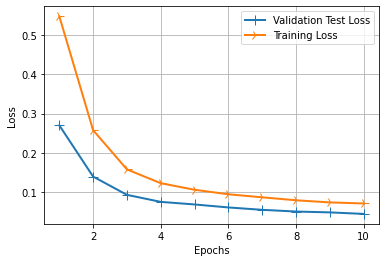

In [8]:
#plot the loss chart.
#Use history object to get our saved performance. create a history dict that will contain history.history.
history_dict = history.history
#Extract the loss and validation.
loss_values = history_dict['loss']
validation_loss_values = history_dict['val_loss']

#get number of epochs and create an array using range() function
epoch = range(1,len(loss_values)+1)

#plot line charts for both validation
line1 = plt.plot(epoch,validation_loss_values, label="Validation Test Loss")
line2 = plt.plot(epoch, loss_values, label = "Training Loss")

plt.setp(line1,linewidth=2.0,marker = '+', markersize= 10.0)
plt.setp(line2,linewidth=2.0,marker = '4', markersize= 10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


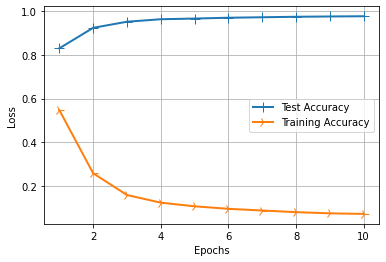

In [9]:
#plot accuracy curve
print(history_dict.keys())

accuracy_values = history_dict['acc']
accuracy_loss_values = history_dict['val_acc']


#get number of epochs and create an array using range() function
epoch = range(1,len(accuracy_values)+1)

line1 = plt.plot(epoch, accuracy_values, label = "Test Accuracy")
line2 = plt.plot(epoch, loss_values, label = "Training Accuracy")

plt.setp(line1,linewidth=2.0,marker = '+', markersize= 10.0)
plt.setp(line2,linewidth=2.0,marker = '4', markersize= 10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

In [10]:
#save the model
model.save('MNIST_Simple_CNN_10-Epoch.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
4	1	0	9	1	

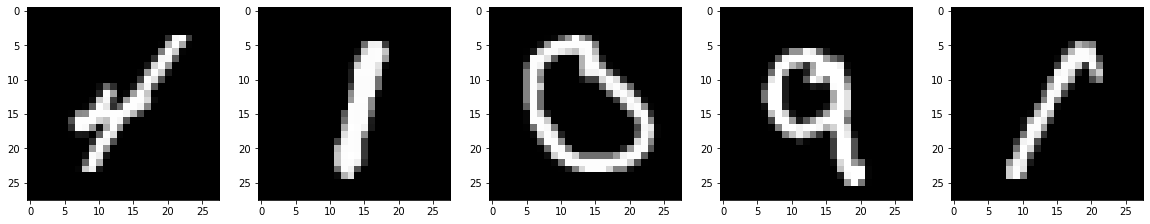

In [11]:
#test using random data
from tensorflow.keras.models import load_model
classifier = load_model('MNIST_Simple_CNN_10-Epoch.h5')

figure = plt.figure(figsize=(20,20))
for i in range(5):
  figure.add_subplot(1,5,i+1)
  random_index = np.random.randint(0, len(x_test))
  plt.imshow(x_test[random_index,:,:,0],cmap='gray')
  # plt.axis('off')
  print(np.squeeze(np.argmax(model.predict(x_test[random_index].reshape(1,28,28,1)),axis=1),axis=0),end = '\t')

# PART 2 (8th Sept,2020)
Visualization of the CNN (8th Sept, 2020) 
Black-box vs White-box models.
Visualization helps show how the model arrived the decisions it takes.

# Objective
Load the trained CNN and understand what they 'see' and learn; this helps us to better understand how the model works.
# Workflow
1. Load dataset from milestone 1.
2. Analyse the model performance by viewing the confusion matrix and classification report.
Confusion matrix- shows true positive, true negative, false positive, false negative.
Classification report- values derived from the confusion matrix. Closely analyse the performance metrics. Aim at identifying the weaknesses of the model. Look at the individual performance of each class of the CNN and see cases where the model has problems classifying data correctly; since accuracy is ~98%.
3. Identify all samples wrongly classified by the model and display the results. 
4.  Extract our layer outputs and create an activation model to visualize the the activations of each layer.
s = activation function(w*input + bias)
5. Display the output shape of the first activation layer and compare it with the output layer shape from the model summary.
6. Show the output of the activation map of the 4th convolutional filter or the feature map of the 1st convolutional layer.
7. Display all the activation of the first 3 layers of the model.

The final output of this part will display the confusion matrix, the classification report and a display of sample data that is wrongly classified. We then display the activation layer for the various CNN layers.



In [12]:
# reload the data and model
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

#load the dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()
model = load_model('MNIST_Simple_CNN_10-Epoch.h5')

In [13]:
#get data into right shape for keras
#have a variable for number of rows and columns
img_rows = x_train[0].shape[0]
img_columns = x_train[0].shape[1]
x_test = x_test.reshape(x_test.shape[0], img_rows, img_columns, 1)

#store the shape of a single image
input_shape = (img_rows,img_columns,1)

#change image type to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalize the data by changing the range from 0-255 to 0-1
x_test /= 255.0
y_test = to_categorical(y_test)
print(x_test.shape[0], 'test samples')

10000 test samples


In [14]:
#displaying the classification report
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict_classes(x_test)

print("Classfication matrix:\n ", classification_report(np.argmax(y_test,axis=1),y_pred))
print("Confusion matrix:\n ",confusion_matrix(np.argmax(y_test,axis=1),y_pred))

Classfication matrix:
                precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion matrix:
  [[ 975    0    1    0    0    0    2    1    1    0]
 [   0 1128    2    2    0    1    1    0    1    0]
 [   1    4 1018    2    1    0    1    3    2    0]
 [   0    0    2 1000    0    3    0  

# Get the mis-classified sample items

In [15]:
import cv2

#load dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#use numpy to create an array to store a value of 1 when misclassification occurs

result = np.absolute(y_test - y_pred)
result_indices = np.nonzero(result>0)

#display indices of the misclass
print('Indices of misclassified sample items are \n'+str(result_indices))

Indices of misclassified sample items are 
(array([ 259,  320,  321,  340,  445,  449,  582,  659,  684,  717,  720,
        740,  844,  846,  882,  947,  965, 1014, 1039, 1182, 1226, 1232,
       1247, 1260, 1299, 1319, 1326, 1364, 1393, 1414, 1500, 1530, 1621,
       1681, 1686, 1709, 1717, 1754, 1878, 1901, 2035, 2043, 2098, 2109,
       2118, 2129, 2130, 2135, 2182, 2189, 2266, 2280, 2293, 2387, 2406,
       2414, 2425, 2454, 2488, 2607, 2654, 2720, 2760, 2780, 2896, 2921,
       2939, 2970, 2995, 3005, 3030, 3060, 3073, 3206, 3289, 3384, 3422,
       3503, 3520, 3558, 3559, 3597, 3726, 3727, 3751, 3767, 3808, 3850,
       3853, 3906, 4007, 4065, 4075, 4078, 4102, 4163, 4176, 4205, 4224,
       4238, 4248, 4256, 4500, 4571, 4575, 4601, 4639, 4740, 4761, 4807,
       4823, 4956, 5331, 5634, 5642, 5888, 5937, 5955, 5973, 6091, 6505,
       6571, 6572, 6576, 6597, 6625, 6651, 7121, 7432, 7434, 8059, 8094,
       8311, 8408, 8527, 9009, 9015, 9019, 9024, 9664, 9692, 9729, 9770,
       

In [16]:
#show a sample of the misclassfied sample item
img_rows = x_train[0].shape[0]
img_columns = x_train[0].shape[1]
x_test = x_test.reshape(x_test.shape[0], img_rows, img_columns, 1)

#store the shape of a single image
input_shape = (img_rows,img_columns,1)

#change image type to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalize the data by changing the range
x_test /= 255.0
y_test = to_categorical(y_test)
print(x_test.shape[0], 'test samples')

10000 test samples


0	8	7	3	0	

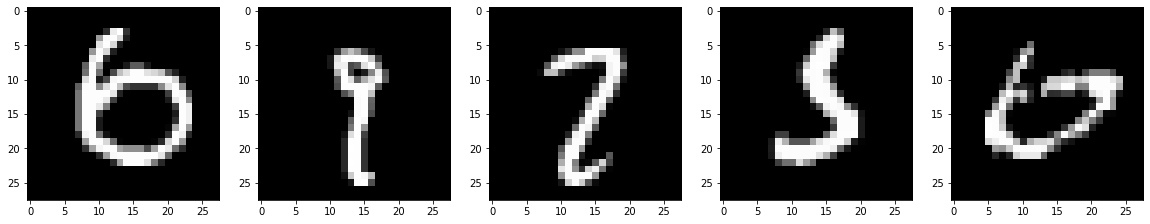

In [17]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(20,20))
for i in range(5):
  figure.add_subplot(1,5,i+1)
  index = result_indices[0][i]
  plt.imshow(x_test[index,:,:,0],cmap='gray')
  # plt.axis('off')
  prediction = np.squeeze(np.argmax(model.predict(x_test[index].reshape(1,28,28,1)),axis=1),axis=0)
  print(prediction, end='\t')

# Viewing the activation maps


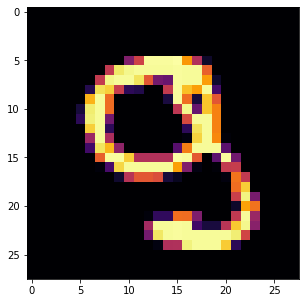

In [18]:
from tensorflow.keras.models import Model

#extract the output of the top 7 layers-layer outputs
layer_outputs = [layer.output for layer in model.layers[:7]]

#create a model to return those outputs given the model's input
activation_model = Model(inputs=model.input,outputs= layer_outputs)

#display the test image of the activation model
img_tensor = x_test[151].reshape(1,28,28,1)
figure1 = plt.figure(figsize=(5,5))
plt.imshow(img_tensor[0,:,:,0],cmap='inferno')
plt.axis='off'

In [19]:
#run the model in predict mode to get the activation layers
# when an image is read, it returns the values of the activation

activations = activation_model.predict(img_tensor)
print("number of activation layers: "+ str(len(activations)))

number of activation layers: 7


In [20]:
# activation of the first conv layer for the image input
first_layer_activation = activations[0]
print(first_layer_activation.shape)
# print(model.summary())

(1, 26, 26, 32)


The output of the first conv layer is seen to be the same as the shape of the output of the 1st convolutional layer of the model (26x26) feature map with 32 convolutional channels.
We then plot the 4th convolution channel/filter of the activation of the 1st layer of the original model.

# Plot output of 4th conv filter in the 1st conv layer.

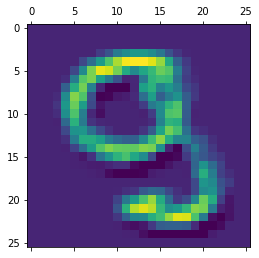

In [21]:
plt.matshow(first_layer_activation[0,:,:,3],cmap = 'viridis')

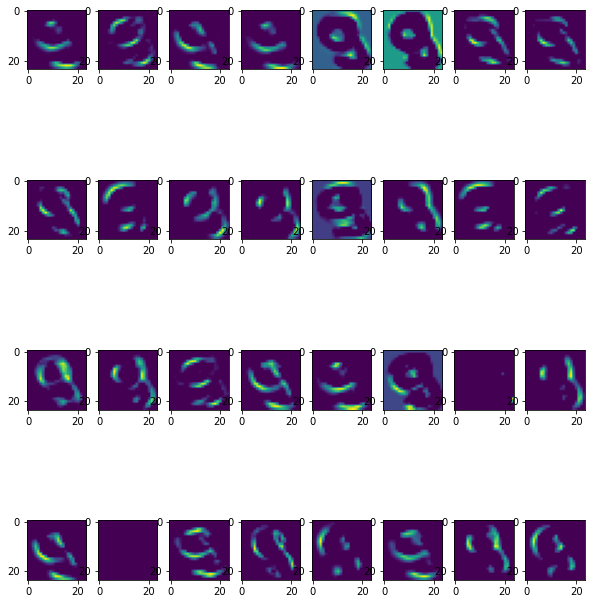

In [22]:
#create a function to display the activation of a specific layer to show the behaviour of how the model makes a decision

def display_activations(activations,col_size,row_size,act_index):
  activation = activations[act_index]
  activation_index = 0
  fig,ax = plt.subplots(row_size,col_size, figsize=(row_size*2.5,col_size*1.5))
  for row in range(0,row_size):
    for col in range(0,col_size):
      ax[row][col].imshow(activation[0,:,:,activation_index],cmap = 'viridis')
      activation_index += 1

display_activations(activations,8,4,1)

# Assignment- Test model using holdout dataset

In [23]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


1  2  3  4  5  8  8  8  9  3  1  2  3  8  5  8  7  8  9  0  1  2  3  4  5  6  7  8  9  6  

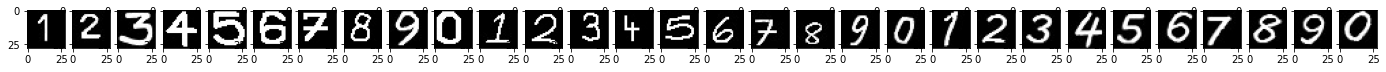

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

model = load_model('MNIST_Simple_CNN_10-Epoch.h5') 
filedir = "/content/gdrive/My Drive/DIP_Dataset"
figure = plt.figure(figsize=(25,25))
predicted_digit_classes = []

for i in range(1,31):        
    figure.add_subplot(1,31,i+1)
    img = image.load_img(filedir +"/" + str(i) + ".jpg") #loaded as image to plot
    test_img = np.asarray(img)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    test_img = cv2.bitwise_not(test_img)
    
    plt.imshow(test_img,cmap ='gray')
    predicted_digit = classifier.predict(test_img.reshape(1,28,28,1))
    print(np.squeeze(np.argmax(predicted_digit,axis = 1),axis=0),end = '  ')

    predicted_digit_classes.append(np.argmax(predicted_digit,axis = 1))

In [25]:
# Displaying the classification report and confusion matrix using holdout_dataset
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

target_image_labels = [[1],[2],[3],[4],[5],[6],[7],[8],[9],[0],
                       [1],[2],[3],[4],[5],[6],[7],[8],[9],[0],
                       [1],[2],[3],[4],[5],[6],[7],[8],[9],[0]]

target_image_labels= np.array(target_image_labels)
predicted_digit_classes = np.array(predicted_digit_classes)

print("Classification report:\n ", classification_report(target_image_labels,predicted_digit_classes))
print("Confusion matrix: \n", confusion_matrix(target_image_labels, predicted_digit_classes))


Classification report:
                precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       0.75      1.00      0.86         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       0.50      0.33      0.40         3
           7       1.00      0.67      0.80         3
           8       0.43      1.00      0.60         3
           9       1.00      1.00      1.00         3

    accuracy                           0.80        30
   macro avg       0.87      0.80      0.80        30
weighted avg       0.87      0.80      0.80        30

Confusion matrix: 
 [[1 0 0 1 0 0 1 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 1 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 1 0 2 0]
 [0 0 0 0 0 0 0 2 1 0]
 [0 0 0 0 0 

In [26]:
#use numpy to create an array to store a value of 1 when misclassification occurs

result = np.absolute(target_image_labels - predicted_digit_classes)
result_indices = np.nonzero(result>0)

#display indices of the misclass
print('Indices of misclassified sample items are \n'+str(result_indices))

Indices of misclassified sample items are 
(array([ 5,  6,  9, 13, 15, 29]), array([0, 0, 0, 0, 0, 0]))


In [27]:
from PIL import Image
import glob

#place all images in one list
all_images=[]
counter=0
for file in glob.iglob('/content/gdrive/My Drive/DIP_Dataset/*.jpg'):
  img = Image.open(file)
  img = cv2.cvtColor(np.float32(img), cv2.COLOR_BGR2GRAY)
  img = image.img_to_array(img)
  img = img.astype('float32')
  img /= 255.0
  img = np.expand_dims(img, axis=0)
  all_images.append(img)
  counter += 1

all_images = np.array(all_images)

(1, 26, 26, 32)


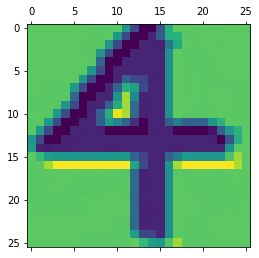

In [28]:
# Visualizing the activation layers and filter of the model
img_tensor = all_images[0].reshape(1,28,28,1)

layer_outputs = [layer.output for layer in model.layers[:7]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0,:,:,3],cmap = 'viridis')

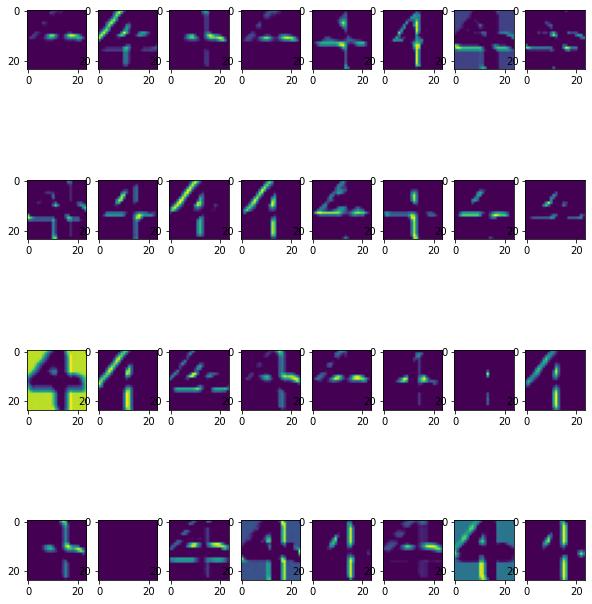

In [29]:
def display_activations(activations,col_size,row_size,act_index):
  activation = activations[act_index]
  activation_index = 0
  fig,ax = plt.subplots(row_size,col_size, figsize=(row_size*2.5,col_size*1.5))
  for row in range(0,row_size):
    for col in range(0,col_size):
      ax[row][col].imshow(activation[0,:,:,activation_index],cmap = 'viridis')
      activation_index += 1

display_activations(activations,8,4,1)

# Assignment Discussion
I created the images using Microsoft Paint to write the digits with the mouse then saved them in a single folder 'DIP_Dataset'.
The Model has an accuracy score of about 88% as shown in the classification report. The model has 7 misclassifications ocurrences of items in position [5,  6,  8,  9, 13, 15, 28].
The classification report shows that the model fails on digits 3,4 and 8 in terms of precision and 6,9,7,4 and 0 in terms of recall.
Precision as a metric describes the model's ability to avoid false-positives. The digit classes where the precision is low indicates the model classified most of the digits in that class wrongly.
Recall describes a model's ability to get all or most true positives. Low scores for both precision and recall is mostly caused by using unbalanced class probability distributions in the dataset or un-corrected model hyper-parameters.

# Transfer learning (15th Sept 2020)
How we can understand transfer learning. How to use a pre-trained model's work to a different model.
Use the model to improve the accuracy on the CIFAR10 dataset
To experience using pre-trained models on real-world datasets.

** Workflow **
1. Load the keras CIFAR10 dataset and train a new, deeper CNN with various configurations; upto activatiion 5.
2. Train the CNN for 10 epochs using a batch_size=32; batch_size doesn't matter significantly as this depends on the RAM size.
- Examine the performance metrics of the trained CNN. Accuracy after 10epochs should be about 60-65%.
3. See what the CNN is capable of by testing the model on some the test images used in PART 1.
How would this model performance compare to human performance.
4. The model created could be disappointing. We now then use the transfer learning to improve the model.
- Load the weights of our earlier model; VGG16 and transfer these to our model.
```
from tensorflow.keras.applications import vgg16 as vgg
```
5. We do not include the top layer when loading.
```
vgg.vgg16(weights='imagenet',include_top =False, input_shape=(48,48,3))
```
6. Extract the last layer from the third block of the vgg16 model and use the vgg model upto block3_pool
7. Add the classification layer of the CIFAR10 classes on top of it. 
8. Freeze all the layers in the pre-trained vgg16 model since we will be using them and compile the merged model. Iterate through our base_models layers and set the trainnable parameters=False by ```layer.trainable=False```
9. Use the keras.Data Generator to load our image data
10. Train the model for at least 5-10 epochs and note the improvement.
11. Visualize the filters of the trained vgg16 model. Load the VGG16 model and extract the conv layers since we want the filters and bias values of those layers.
- Inspect and uunderstand the bias and weights using 3rd conv layer using ```get_weights```
12. Plot the first 6 conv filters.
- Normalize the filter values to between 0-1.
- Get filters using ```f = filters[:,:,:,i]```
- Plot and visualize using ```plt.imshow(filters,cmap='gray')```
13. Visualize the features map of the VGG by running an image. Refine the model to output the right output after the first conv layer using ```model=model.input,output=model.layers.output)```
Using the inbuilt keras-preprocessing functions, use load_image and img_to_array and np.expand_dims and keras.vgg16
14. Plot the features map for the output of the 5 conv block indexed as [2,9,13,17]

In [30]:
from __future__ import print_function
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import os

In [31]:
BATCH = 32
num_classes = 10
epochs = 5

#load cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

#display the data shape and dimensions
print("x_train.shape: ", x_train.shape)
print(x_train.shape[0], "train samples")
print( x_test.shape[0], "test samples")

x_train.shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [32]:
#format the training data 
#changing the datatype
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

#one-hot encoding the labels
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

In [33]:
model = Sequential()
#padding='same' results in padding the input such that the output has the same length as the original input
model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)       

In [34]:
#train our model
history = model.fit(x_train,y_train, batch_size = BATCH, epochs = epochs,shuffle=True, verbose=1, validation_data=(x_test,y_test))
model.save("CIFAR_Simple_CNN_model.h5")

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 18s 360us/sample - loss: 2.0800 - acc: 0.2268 - val_loss: 1.8462 - val_acc: 0.3468
Epoch 2/5
50000/50000 [==============================] - 16s 326us/sample - loss: 1.7657 - acc: 0.3581 - val_loss: 1.6444 - val_acc: 0.4082
Epoch 3/5
50000/50000 [==============================] - 16s 329us/sample - loss: 1.5966 - acc: 0.4174 - val_loss: 1.4317 - val_acc: 0.4803
Epoch 4/5
50000/50000 [==============================] - 16s 326us/sample - loss: 1.4725 - acc: 0.4669 - val_loss: 1.4164 - val_acc: 0.5015
Epoch 5/5
50000/50000 [==============================] - 16s 326us/sample - loss: 1.3876 - acc: 0.4977 - val_loss: 1.2556 - val_acc: 0.5552


In [35]:
#obtain the accuracy using the evaluate function
score = model.evaluate(x_test,y_test,verbose=1)
print("Test loss: ",score[0])
print("Test accuracy: ",score[1])

10000/10000 [==============================] - 1s 147us/sample - loss: 1.2556 - acc: 0.5552
Test loss:  1.2556172395706178
Test accuracy:  0.5552


In [36]:
#create function to get class labels
def getName(label,class_labels):
    return class_labels.get(int(label))

Horse	Cat	Bird	Truck	Bird	

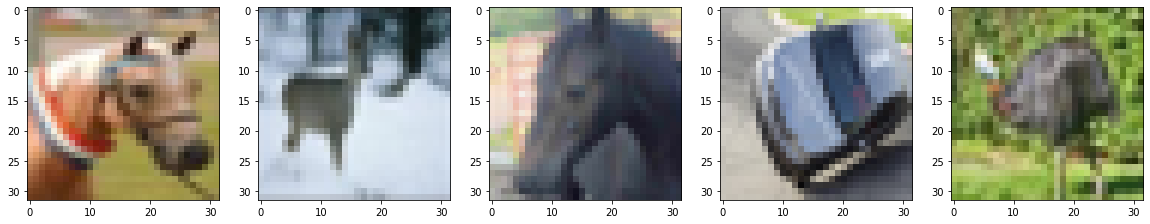

In [37]:
#test on some of the test images
#display the images
import numpy as np
import matplotlib.pyplot as plt
import cv2

class_labels = {0:'Airplane',1:'Automobile',2:'Bird',3:'Cat',4:'Deer',5:'Dog',6:'Frog',7:'Horse',8:'Ship',9:'Truck'}

figure = plt.figure(figsize=(20,20))
for i in range(5):
  figure.add_subplot(1,5,i+1)
  random_index = np.random.randint(0,len(x_test))
  plt.imshow(x_test[random_index])
  label = np.squeeze(np.argmax(model.predict(x_test[random_index].reshape(1,32,32,3)), axis=1), axis=0)
  # print(label)
  print(getName(label,class_labels), end='\t')

#Transfer learning


In [38]:
#perform the imports
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import vgg16 as vgg
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

LEARNING_RATE = 1e-4
BATCH_SIZE = 32
EPOCHS =5
NUM_CLASSES = 10
MOMENTUM = 0.9

import scipy.misc

(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = np.array([cv2.resize(x,(48,48),interpolation=cv2.INTER_AREA) for x in x_train])
x_test= np.array([cv2.resize(x,(48,48),interpolation=cv2.INTER_AREA) for x in x_test])

In [39]:
#perform one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,NUM_CLASSES)
y_test = to_categorical(y_test,NUM_CLASSES)

#import the pre-trained model vgg16 without the head layer
from tensorflow.keras.applications import vgg16 as vgg

base_model = vgg.VGG16(weights='imagenet',include_top=False,input_shape=(48,48,3))


#Extract the last layer from the 3rd block of the VGG16 model

In [40]:
last_layer = base_model.get_layer('block3_pool').output

#add a classfication layers on top of last_layer
# x is our model that we are putting on top of the pre-trained model
x = GlobalAveragePooling2D()(last_layer)
x = BatchNormalization()(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(256, activation = 'relu')(x)
x = Dropout(0.5)(x)

#make the top model
number_of_classes = 10
top = Dense(number_of_classes,activation='softmax')(x)
#construct 
model = Model(base_model.input,top)

In [41]:
#freeze the all layers in the model to re-use the model
#Iterate through the base_model to freeze the layers so that we don't train them
for layer in base_model.layers:
  layer.trainable=False

#compile the merged model
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr= 1e-4),metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

## Set up to use the data generator function (22nd Sept 2020)


In [42]:
train_datagen = ImageDataGenerator(rescale=1.0 /255.0, horizontal_flip=False)

#use our Data Generator to get our data
train_datagen.fit(x_train)
train_datagen = train_datagen.flow(x_train, y_train, batch_size= BATCH_SIZE)
val_datagen = ImageDataGenerator(rescale=1.0 /255.0, horizontal_flip=False)
val_datagen.fit(x_test)
val_generator = val_datagen.flow(x_test, y_test, batch_size= BATCH_SIZE)

In [43]:
#train the model
train_steps_per_epoch = x_train.shape[0] // BATCH_SIZE
val_steps_per_epoch = x_test.shape[0] // BATCH_SIZE

history1 = model.fit(train_datagen,steps_per_epoch=train_steps_per_epoch,
                     validation_data=val_generator,validation_steps=val_steps_per_epoch,epochs=EPOCHS,verbose =1)

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1562/1562 [==============================] - 34s 22ms/step - loss: 0.2307 - acc: 0.9142 - val_loss: 0.1746 - val_acc: 0.9315
Epoch 2/5
1562/1562 [==============================] - 32s 21ms/step - loss: 0.1800 - acc: 0.9305 - val_loss: 0.1530 - val_acc: 0.9393
Epoch 3/5
1562/1562 [==============================] - 33s 21ms/step - loss: 0.1636 - acc: 0.9365 - val_loss: 0.1426 - val_acc: 0.9431
Epoch 4/5
1562/1562 [==============================] - 33s 21ms/step - loss: 0.1537 - acc: 0.9402 - val_loss: 0.1359 - val_acc: 0.9457
Epoch 5/5
1562/1562 [==============================] - 33s 21ms/step - loss: 0.1460 - acc: 0.9430 - val_loss: 0.1309 - val_acc: 0.9479


With 5 epochs using transfer learning, our accuracy is approx. 73% compared to 52% of the previous model.
We are thus taking advantage of pre-trained model's weights and only training the top layers.
We need to check what exactly those learned weights know.

#Visualize the filters of the pre-trained vgg16 model

In [44]:
from tensorflow.keras.applications import vgg16 as vgg16

model = vgg.VGG16(weights='imagenet',include_top=False)

# get the symbolic outputs of each 'key' layer (we give them unique names)
layer_dict=dict([(layer.name, layer) for layer in model.layers])

In [45]:
#get a summary of the
for layer in model.layers:
  #check for conv layer
  if 'conv' not in layer.name:
    continue
  # get
  filters, biases = layer.get_weights()
  print(layer.name,filters.shape)

#retrieve the weights of the 3rd hidden layer
filters, biases = model.layers[2].get_weights()

print(filters.shape)
print(biases.shape)


block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)
(3, 3, 64, 64)
(64,)


In [46]:
#normalize the filters value to be btwn 0-1 so we can visualize them.
f_min, f_max = filters.min(), filters.max()
filters = (filters-f_min)/(f_max-f_min)

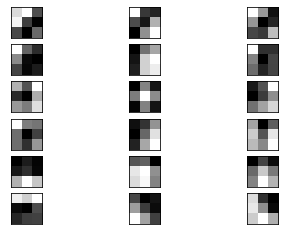

In [47]:
#visualize the filters
import matplotlib.pyplot as plt

#plt the first few filters
num_filters, ix = 6,1

for i in range(num_filters):
  f = filters[:,:,:,i]
  #plot each channel separately
  for j in range(3):
    #specify subplot
    ax = plt.subplot(num_filters, 3, ix)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.imshow(f[:,:,j],cmap='gray')
    ix = ix+1
plt.show()

# Visualize the activation feature maps for the vgg16 model by running an input image

In [48]:
#plot the feature map of the first conv layer for a given image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from numpy import expand_dims

model = VGG16()

In [49]:
#create a 
#redefine model to output right after the first hidden layer
model = Model(inputs=model.input, outputs=model.layers[1].output)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


29th Sept 2020
After applying the filters in the 1st conv layer,
some filters focus on the background, some focus on elements in the forgeround.

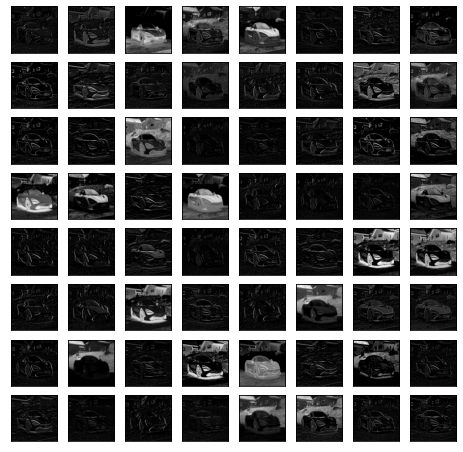

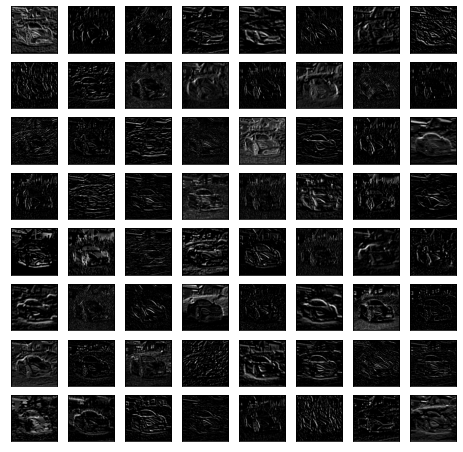

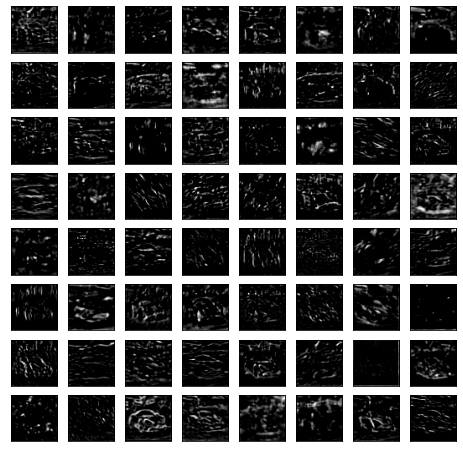

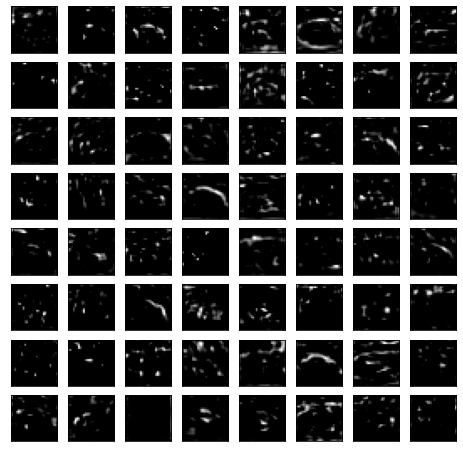

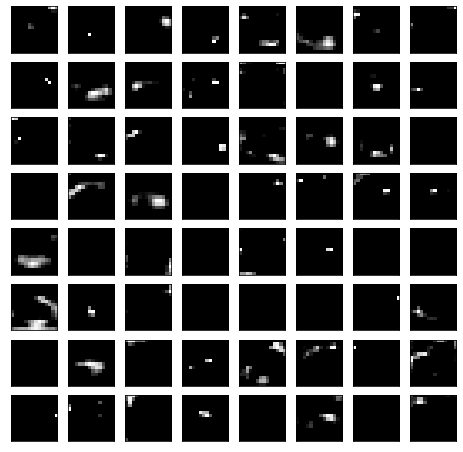

In [50]:
plt.rcParams["figure.figsize"]= (8,8)
model=VGG16()
# the Conv layer that we wish to visualize
ixs=[2,5,9,13,17]
outputs=[model.layers[i].output for i in ixs]
model=Model(inputs=model.inputs, outputs=outputs)
img=load_img('/content/gdrive/My Drive/car1.jpg', target_size=(224,224))
#convert the image to an arrayimg=img_to_array(img)
#expand the dimenstion so that it represents a single sample
img=expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img=preprocess_input(img)
#get the feature map for the first hidden layer
feature_maps=model.predict(img)
#plot the output from each block
square=8
for fmap in feature_maps:  #plot all the 64 maps in an 8x8 squares
  ix=1
  for _ in range(square):
    for _ in range(square):
      #specify the subplot and turn of axis
      ax=plt.subplot(square, square, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      #plot the filter channel in grayscale
      plt.imshow(fmap[0,:,:,ix-1], cmap='gray')
      ix +=1
  #show the figure
  plt.show()

This gives us 5 plots showing the feature maps on the 5 main blocks on the vgg16 model. we can see that the feature maps closer to the input show more details and the detail reduces as you go further down.
This does not mean that the higher layers run simpler, it means the small size upper conv layers are activated by a combo of diff. lower layer filters hence this is how they run more complex patterns.

#**PART 4** 6th October, 2020
- Visualizing filter maximization- how to visualize input to maximize the filters
- Gradient-CAM gradient-weighted class-activated activation mapping.
- Class maximization

To gain experience in performing gradient-ascent and utilizing keras.backend function.
Visualize what areas in an image trigger the neural network's decision making procedure. we will use gradient-weighted class activation mapping.
Visualize input that maximizes specific classes- to gain insight into what a conv neural net thinks what each class looks like.

# Workflow
Learn how to maximize- load the vgg16 pre-trained model
Build a loss fn that seeks to maximize the activation of an individual filter of your choice

In [51]:
#maximize filter activation
# add a loss function to maximize the value of a given filter in a given convolution layer. We then use stochastic
# gradient-descent to adjust the values of the input image so as to maximize the activation value

from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
from tensorflow.keras import backend as K

model = VGG16(weights='imagenet',include_top=False)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [54]:
#initialize an image which we will send to the model
import tensorflow as tf

# create new model of intermediate layer
layer_output = model.get_layer('block5_conv3').output
activation = models.Model(model.input, layer_output) # new model_defines

# initialize an image which we will send to the model
def init_image():
    image = tf.random.uniform((1, 150, 150, 3))
    image = (image - .5) * .25
    return image

#define loss for filter visualization. examine 
def visualization_loss(image, filter_index):
    feature = activation(image)
    loss = tf.math.reduce_mean(feature[:, 2:-2, 2:-2, filter_index])
    return loss

# define gradient descent for image visualition
def gradient(image, filter_index):
    for i in range(30):
        with tf.GradientTape() as tape:
            tape.watch(image)
            loss = visualization_loss(image, filter_index)
        grads = tape.gradient(loss, image)
        grads = tf.math.l2_normalize(grads)
        image += 10* grads
        return loss, image

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#util function to convert a tensor into a valid image
def deprocess_image(x):
  #normalize tensor: center on 0.0, ensure that std is 0.1

  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1

  #clip to (x, 0, 1)
  x += 0.5
  x = np.clip(x, 0, 1)
  #convert to rgb array
  x *= 255
  x = np.clip(x, 0, 255).astype('uint8')
  return x

# def visualization_filter_index(filter_index):
#   image = init_image()
#   for i in range(30):
#     loss, image = gradient(image, filter_index)
#     img = deprocess_image(image[0].numpy())  #not working with tensorflow=1.x
#     plt.imshow(img)

# visualization_filter_index(0)

In [55]:
# explore the 3rd conv block
layer_name = 'block3_conv1'
filter_index = 0

#build a loss function that maximizes activation of the n-th filter of the layers considered. Use the get_layer fn.
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:,:,filter_index])

To implement gradient-descent on the layer, we need the gradient of loss with respect to the model's input. we need to use the gradient-activation function packaged with the Keras backend model

In [56]:
#compute the gradient of the input image with respect to the loss function
# tf.compat.v1.disable_eager_execution()

grads = K.gradients(loss, model.input)[0]
# normalize gradient-descent: to help the gadient descent process go by smoothly
grads = grads/(K.sqrt(K.mean(K.square(grads))) + 1e-5)



To help the gradient-descent process to go smoothly, we can normalize the graident tensors by dividing it by it L2 norm- the sqrt of the average of square the values in the tensor.
This ensures the magnitude of the update to the image is always within the same range.
We need a way to compute the value of the loss tensor and the gradient tensor for a given input image.
We dfefine a Keras backend iterate function- takes a numpy tensor as a list of tensors of size 1; it returns a list of two numpy tensors-loss value and the gradient value.

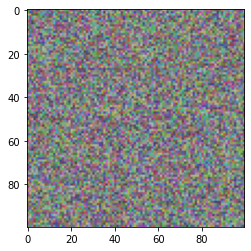

In [59]:
#the resulting image tensor is a floating point tensor of shape (1,150,150,3)
#with values that may not be integers in the range 0-255. Hence, we need to post-process the tensor
# to turn it to an image that can be displayed
  

def deprocess_image(x):
    # normalize array center on 0. ensure variance is .15
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.15
    
    # center crop
    x = x[25:-25, 25:-25, :]
    # clip to
    x += 0.5
    x = np.clip(x,0,1)
    #convert to rgb array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

img = input_img_data[0]
plt.imshow(deprocess_image(img))

#3rd Nov 2020


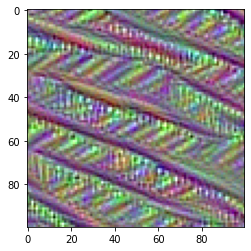

In [60]:
def generate_pattern(layer_name, filter_index, size=150):
  layer_output = model.get_layer(layer_name).output
  loss = K.mean(layer_output[:,:,:,filter_index])
  grads = K.gradients(loss, model.input)[0]
  grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
  iterate = K.function([model.input],[loss,grads])
  input_img_data = np.random.random((1,size,size,3)) * 20 + 128.0
  step = 1.0
  for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step
  img = input_img_data[0]
  return deprocess_image(img)

plt.imshow(generate_pattern('block3_conv3',22))

In [61]:
# Implementing Grad-CAM
import tensorflow as tf
import numpy as np
from tensorflow import keras
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Use the Xception model to demo the grad-CAM

In [62]:
#load the Xception model
model_builder = keras.applications.xception.Xception

#define inout size for image
img_size = (299,299)
#extract the preprocess input and decode predict functions
pre_process = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

#store the names of the last conv layer and the classifier names
last_conv_layer_name = 'block14_sepconv2_act'
classifier_layer_names = ['avg_pool','predictions',]

In [63]:
#point to our image
img_path = keras.utils.get_file('african_elephant.png','https://i.imgur.com/Bvro0YD.png')
display(img_path)

4218880/4217496 [==============================] - 2s 0us/step


'/root/.keras/datasets/african_elephant.png'

create a helper fn that loads the img in the right format

In [64]:
def get_img_array(img_path, size):
  #the image is a PIL image of size 299x299
  img=keras.preprocessing.image.load_image(img_path, target_size=size)
  array = keras.preprocessing.image.img_to_array(img)
  array = np.expand_dims(array,axis=0)
  return array

In [65]:
#GRAD CAM heatmap function
def make_grad_heatmaop(img_array, model,last_conv_layer_name,classifier_layer_names):
  #create a model that maps input img to the activations
  last_conv_layer = model.get_layer(last_conv_layer_name)
  last_conv_layer_model = keras.Model(model.inputs,last_conv_layer.output)

  #create a model that maps the activations of the last_conv_layer to final class predictions